In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

###Import dos dados


In [16]:
Data_Autoveiculos= pd.read_excel('/content/drive/MyDrive/SeriesTemporais_Autoveiculos.xlsm')
Data_Empregos = pd.read_excel('/content/drive/MyDrive/SeriesTemporais_Emprego.xlsx')
Data_Export = pd.read_excel('/content/drive/MyDrive/SeriesTemporais_Exportacoes_em_valor.xlsx')

##Visualização das tabelas


In [17]:
Data_Autoveiculos

,Unnamed: 0,Nota 1: Os dados de licenciamento até 2001 (inclusive) referem-se às vendas no atacado.,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaT,Nota 2: Os dados de produção e exportação refe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,2050317,1776860,273457,2176784,516568,1688289,1484744,203545,1798894,...,50560,48743,1817,60482,21548,11161,11154,7,18705,9765
2,NaT,AUTOVEÍCULOS TOTAL,NaN,NaN,NaN,NaN,AUTOMÓVEIS,NaN,NaN,NaN,...,CAMINHÕES,NaN,NaN,NaN,NaN,ÔNIBUS,NaN,NaN,NaN,NaN
3,NaT,Licenciamento Total,Licenciamento Nacionais,Licenciamento Importados,Produção,Exportação,Licenciamento Total,Licenciamento Nacionais,Licenciamento Importados,Produção,...,Licenciamento Total,Licenciamento Nacionais,Licenciamento Importados,Produção,Exportação,Licenciamento Total,Licenciamento Nacionais,Licenciamento Importados,Produção,Exportação
4,1957-01-01,2009,2009,0,2317,0,758,758,0,1091,...,1037,1037,0,981,0,110,110,0,148,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,2024-08-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
816,2024-09-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
817,2024-10-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
818,2024-11-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
Data_Empregos

,Unnamed: 0,TOTAL,AUTOVEÍCULOS,MÁQUINAS AGRÍCOLAS E RODOVIÁRIAS
0,NaT,Emprego,Emprego,Emprego
1,1983-01-01,122168,104428,17740
2,1983-02-01,121449,103850,17599
3,1983-03-01,121788,104249,17539
4,1983-04-01,122204,104672,17532
...,...,...,...,...
489,2023-09-01,nd,100566,nd
490,2023-10-01,nd,100642,nd
491,2023-11-01,nd,101172,nd
492,2023-12-01,nd,98933,nd


In [19]:
Data_Export

,Unnamed: 0,TOTAL,AUTOVEÍCULOS,MÁQUINAS AGRÍCOLAS E RODOVIÁRIAS
0,NaT,Exportações US$ mil,Exportações US$ mil,Exportações US$ mil
1,1985-01-01,114392,96258,18134
2,1985-02-01,144245,126868,17377
3,1985-03-01,145912,123858,22054
4,1985-04-01,102852,94702,8150
...,...,...,...,...
465,2023-09-01,nd,761339.347614,nd
466,2023-10-01,nd,878447.972938,nd
467,2023-11-01,nd,751968.53721,nd
468,2023-12-01,nd,721376.793985,nd


##limpeza de dados padrão


In [20]:
Data_Autoveiculos.dropna(inplace=True)
Data_Empregos.dropna(inplace=True)
Data_Export.dropna(inplace=True)

In [21]:
Data_Export.replace('nd',0.0)
Data_Export.head()

,Unnamed: 0,TOTAL,AUTOVEÍCULOS,MÁQUINAS AGRÍCOLAS E RODOVIÁRIAS
1,1985-01-01,114392,96258,18134
2,1985-02-01,144245,126868,17377
3,1985-03-01,145912,123858,22054
4,1985-04-01,102852,94702,8150
5,1985-05-01,135230,114890,20340


In [22]:
Data_Export.columns

Index(['Unnamed: 0', 'TOTAL', 'AUTOVEÍCULOS',
       'MÁQUINAS AGRÍCOLAS E RODOVIÁRIAS'],
      dtype='object')

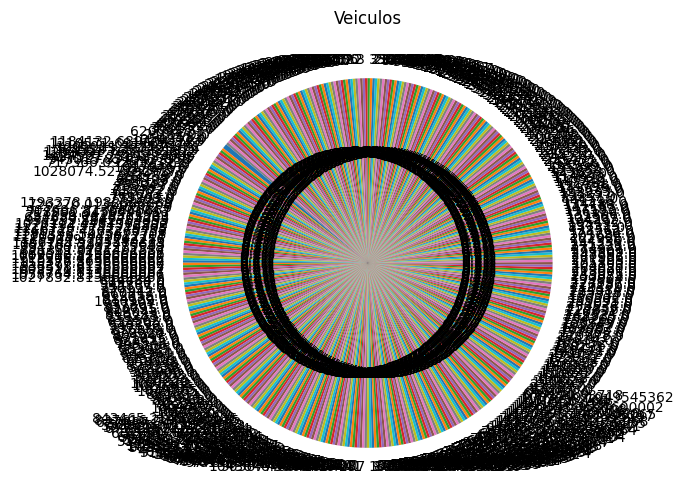

In [23]:
counts = Data_Export['AUTOVEÍCULOS'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Veiculos");
plt.show()

###Muitos dados para um simples curso rapido introdutorio a Data Science, seria necessário uma limpeza profunda.
##Seria beirando a um Big Data ou até mesmo sendo criado um Data Warehouse

###DataSet para Educação
#####COMIDA ONLINE


In [24]:
Df = pd.read_csv('https://raw.githubusercontent.com/Riuchek/Python/main/onlinefoods.csv')
Df ##olha a tabela completa

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [25]:
Df.head(10) ##melhor visualização dos dados da parte de cima até a 10 posicao(0-9)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
5,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Yes,Positive,Yes
6,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
7,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
8,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
9,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes


In [26]:
Df.tail(10) ##melhor visualização dos dados da parte de baixo as ultimas 10 posições

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
378,23,Female,Single,Employee,25001 to 50000,Post Graduate,2,12.9847,77.5491,560100,Yes,Positive,Yes
379,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
380,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Yes,Positive,Yes
381,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
382,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes
387,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive,Yes


In [27]:
Df.shape ##quantidade de linhas e colunas

(388, 13)

In [28]:
Df.info() #tipo de dados dentro do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [29]:
Df.isna().sum() ##verificação de possiveis Not a Number

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [30]:
Df.describe() #descrição rapida de cada coluna

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [31]:
Df = Df.drop(labels = "Unnamed: 12", axis=1) ##retira tabela inutil / nao utilizada

In [32]:
Df.columns ##nome das tabelas

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback'],
      dtype='object')

###Muda nome das colunas "Remapear"

In [33]:
Df.rename(columns={'Age':'Idade','Gender':'Genero','Marital Status':'Estado Civil','Occupation':'Emprego',
'Monthly Income':'Renda Mensal','Educational Qualifications':'Educação','Family size':'Familiares','latitude':'Lat','longitude':'Long',
 'Pin code':'Codigo Pin','Output':'Saida','Feedback':'Feedback'
},inplace=True)
Df.columns

Index(['Idade', 'Genero', 'Estado Civil', 'Emprego', 'Renda Mensal',
       'Educação', 'Familiares', 'Lat', 'Long', 'Codigo Pin', 'Saida',
       'Feedback'],
      dtype='object')

##Plots simples a serem melhorados / pouca usuabilidade

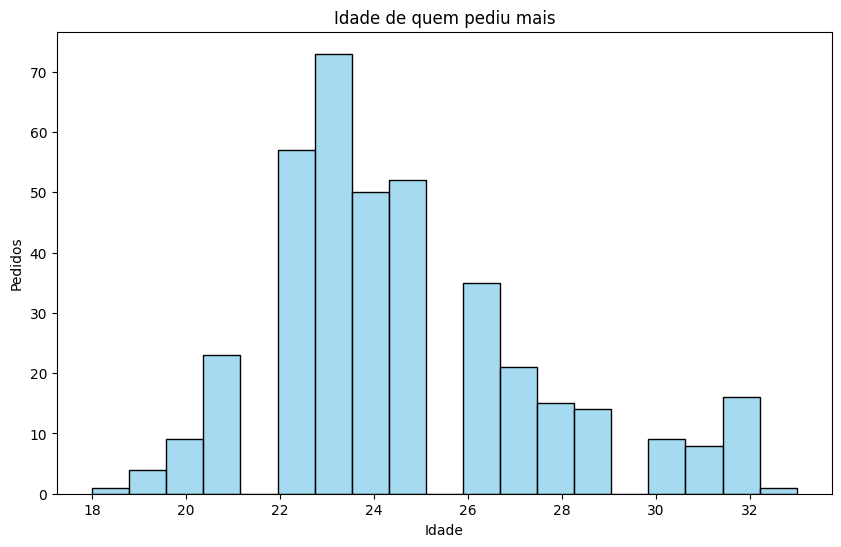

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(data=Df, x='Idade', color='skyblue')
plt.ylabel('Pedidos')
plt.xlabel('Idade')
plt.title("Idade de quem pediu mais");
plt.show()

##Em pizza

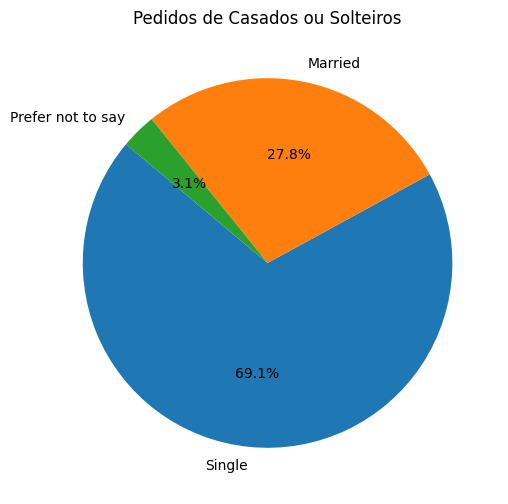

In [35]:
counts = Df['Estado Civil'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Pedidos de Casados ou Solteiros");
plt.show()

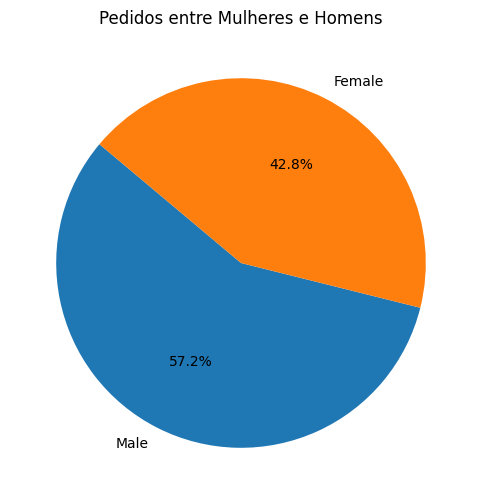

In [36]:
counts_gender = Df['Genero'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts_gender, labels=counts_gender.index, autopct='%1.1f%%', startangle=140)
plt.title("Pedidos entre Mulheres e Homens");
plt.show()

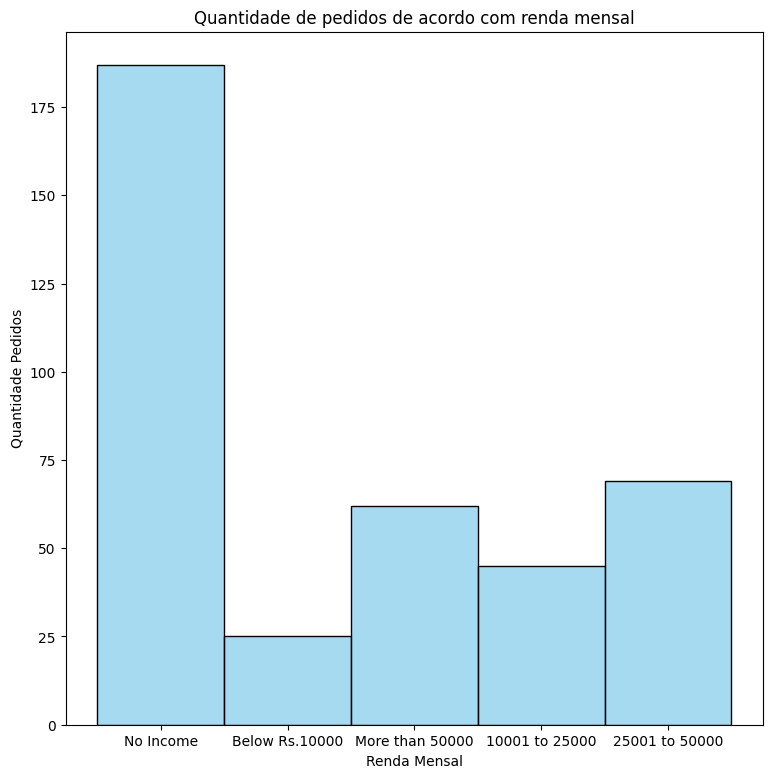

In [37]:
plt.figure(figsize=(9,9))
sns.histplot(data=Df, x='Renda Mensal', color='skyblue')
plt.ylabel('Quantidade Pedidos')
plt.xlabel('Renda Mensal')
plt.title("Quantidade de pedidos de acordo com renda mensal");
plt.show()

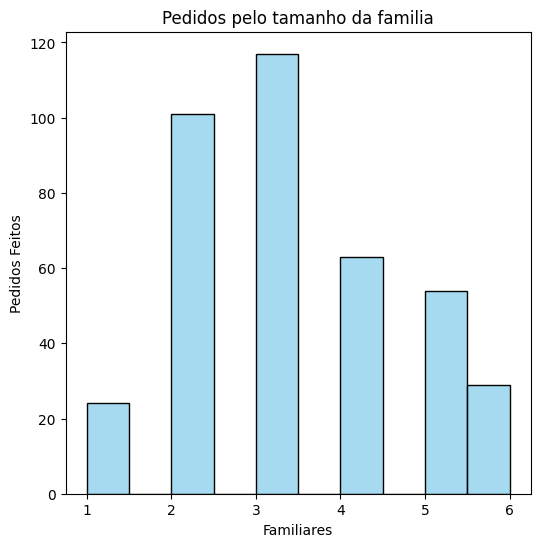

In [38]:
plt.figure(figsize=(6,6))
sns.histplot(data=Df, x='Familiares', color='skyblue')
plt.ylabel('Pedidos Feitos')
plt.xlabel('Familiares')
plt.title("Pedidos pelo tamanho da familia");
plt.show()

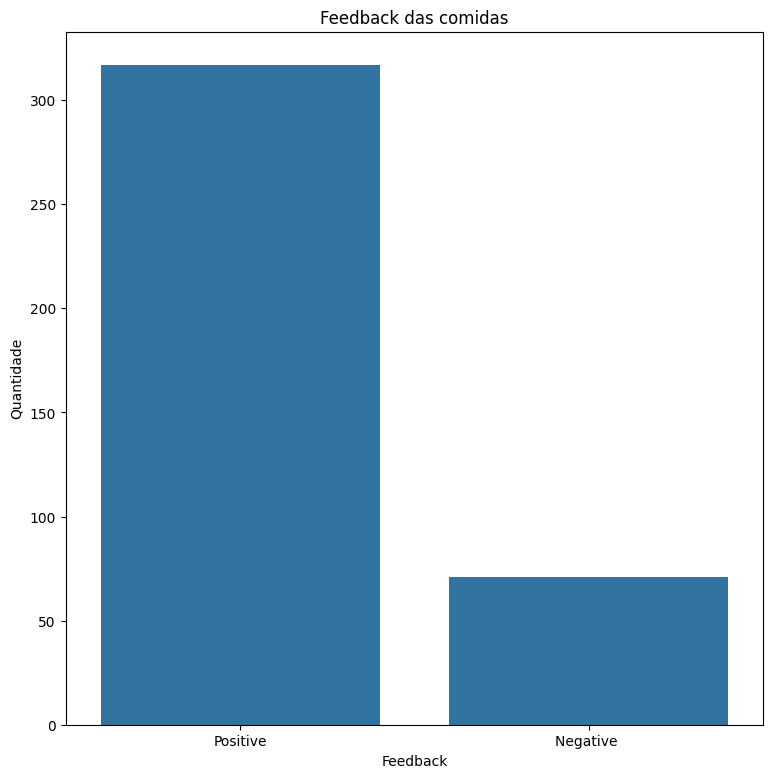

In [39]:
count = Df['Feedback'].value_counts()
plt.figure(figsize=(9,9))
sns.barplot( x=count.index,y=count.values)
plt.ylabel('Quantidade')
plt.xlabel('Feedback')
plt.title("Feedback das comidas");
plt.show()

##Outro teste de dataset

In [40]:
salario = pd.read_csv('https://raw.githubusercontent.com/Riuchek/Python/main/Salary_Data.csv')

In [41]:
salario.rename(columns={'Age':'Idade','Gender':'Genero','Education Level':'Nivel Educacional','Job Title':'Emprego',
'Years of Experience':'Anos de Experiencia','Salary':'Salario'
},inplace=True)
salario

,Idade,Genero,Nivel Educacional,Emprego,Anos de Experiencia,Salario
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


##Limpeza de dados

In [42]:
salario.isnull().sum()

Idade                  2
Genero                 2
Nivel Educacional      3
Emprego                2
Anos de Experiencia    3
Salario                5
dtype: int64

In [43]:
salario.dropna(inplace=True)
salario[salario.duplicated()]

,Idade,Genero,Nivel Educacional,Emprego,Anos de Experiencia,Salario
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [44]:
salario.drop_duplicates(inplace=True)

In [46]:
salario.reset_index(inplace=True, drop=True)
#https://www.kaggle.com/code/yosefibrahim/salary-prediction

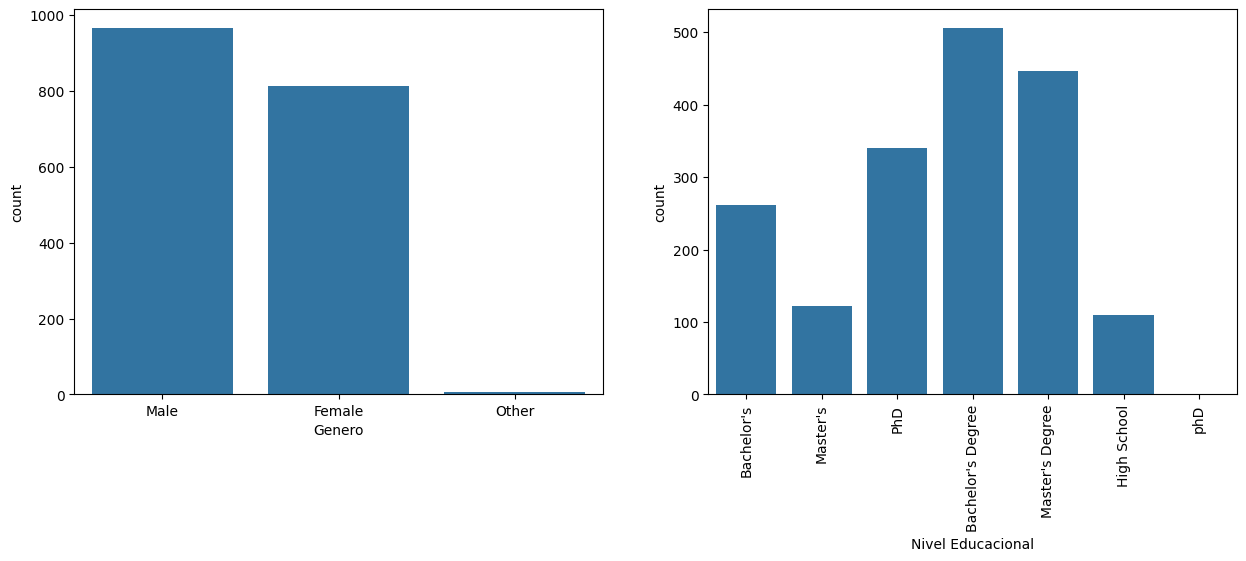

In [49]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Genero',data=salario,ax = ax[0])
sns.countplot(x='Nivel Educacional',data = salario,ax=ax[1])
plt.xticks(rotation=90)
plt.show()